# Step 1 - Import Packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from collections import Counter
%matplotlib inline 

# Step 2 - Data Cleaning and data exploration
Load the data and show first 4 rows

In [2]:
# Load csv file
# Show first 4 observations

raw_data = pd.read_csv('titanic.csv')
raw_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Fill empty and NaNs values with NaN

data = raw_data.fillna(np.nan)

# Check for null and missing values

data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Summerize the data, look for possible outliers

In [4]:
#Summerize the data above

data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Look for outliers in Fare

(array([ 728.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

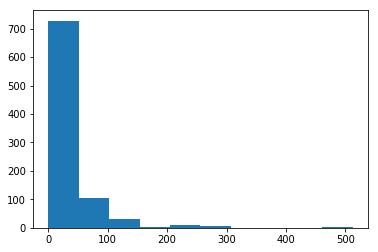

In [5]:
plt.hist(data["Fare"])

In [6]:
#Checking observations with fare above 400.

data[data.Fare > 400]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
257,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292
676,1,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292
733,1,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292


Split name column into Name and Title, look for possible titles to be used as indicator variable.

In [7]:
#Split name column by '.'

data['Title'], data['Name'] = data['Name'].str.split('.', 1).str

In [8]:
#Count of Each unique title

data.groupby(["Title"]).size()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              513
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

In [9]:
# Convert to categorical values Title 

# List of Rare titles
# Map titles to category
# Make calumn Title_2

data["Title_2"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data["Title_2"] = data["Title_2"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
data["Title_2"] = data["Title_2"].astype(int)

Titles in category 0,1 and 2 already have their information contained in age and sex. However for rare titles it would be interested to know if they were given any preferences when evacuating.

In [10]:
# Make new column Rare and populate it with 0
# If Title_2 = 3, Rare = 1
# Drop the unused columns

data['Rare'] = 0
data.loc[data['Title_2'] == 3, 'Rare'] = 1
data = data[["Survived", "Pclass", "Name", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "Rare"]]

Text(0.5,1,'Distribution of Survived')

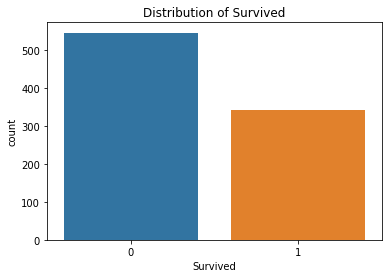

In [11]:
# Plot the count plot.
# Add plot title

SUV_plot = sns.countplot(x = "Survived", data = data)
SUV_plot.set_title("Distribution of Survived")

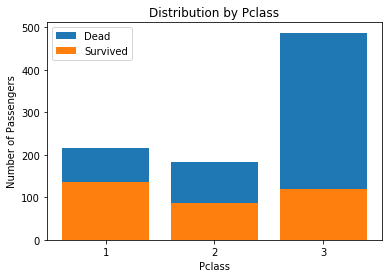

In [12]:
# Count of Dead passengers and their Pclass
# Count of Survived passengers and their Pclass
# List of Pclass
# Bar plot of Dead
# Bar plot of survived
# X ticks
# Legend
# Set x label
# Set y lebel
# Set title
# Print graph

Dead = pd.DataFrame(data = data[data['Survived']==0].groupby(["Pclass"]).size())
Survived = pd.DataFrame(data = data[raw_data['Survived']==1].groupby(["Pclass"]).size())
Pclass = [1,2,3]
p1 = plt.bar(Pclass, Dead.iloc[:,0], bottom=Survived.iloc[:,0])
p2 = plt.bar(Pclass, Survived.iloc[:,0])
plt.xticks(Pclass, ('1', '2', '3'))
plt.legend((p1[0], p2[0]), ('Dead', 'Survived'))
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Distribution by Pclass')
plt.show()

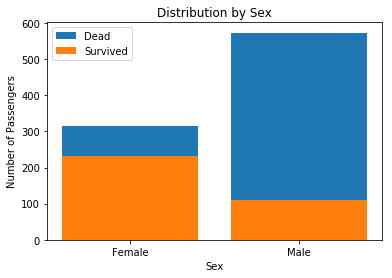

In [13]:
# Count of Dead passengers and their Pclass
# Count of Survived passengers and their Pclass
# List of Pclass
# Bar plot of Dead
# Bar plot of survived
# Legend
# Set x label
# Set y lebel
# Set title
# Print graph

DeadBySex = pd.DataFrame(data = data[data['Survived']==0].groupby(["Sex"]).size())
SurvivedBySex = pd.DataFrame(data = data[data['Survived']==1].groupby(["Sex"]).size())
Sex = ["Female","Male"]
p1 = plt.bar(Sex, DeadBySex.iloc[:,0], bottom=SurvivedBySex.iloc[:,0])
p2 = plt.bar(Sex, SurvivedBySex.iloc[:,0])
plt.legend((p1[0], p2[0]), ('Dead', 'Survived'))
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Distribution by Sex')
plt.show()

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


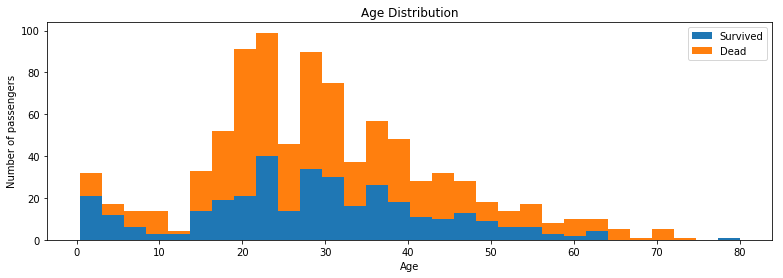

In [14]:
figure = plt.figure(figsize=(13,4))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, bins=30, label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age Distribution')
plt.legend()

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


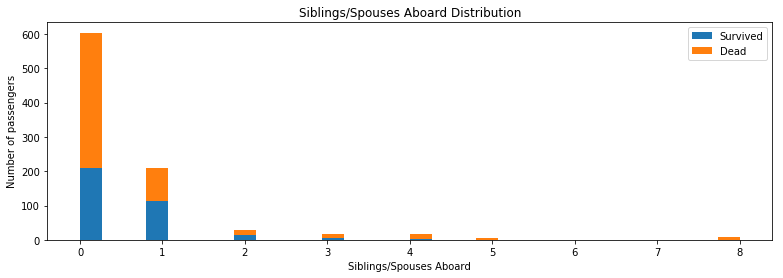

In [15]:
figure = plt.figure(figsize=(13,4))
plt.hist([data[data['Survived']==1]['Siblings/Spouses Aboard'],
          data[data['Survived']==0]['Siblings/Spouses Aboard']], stacked=True, bins=30, label=['Survived','Dead'])
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Number of passengers')
plt.title('Siblings/Spouses Aboard Distribution')
plt.legend()

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


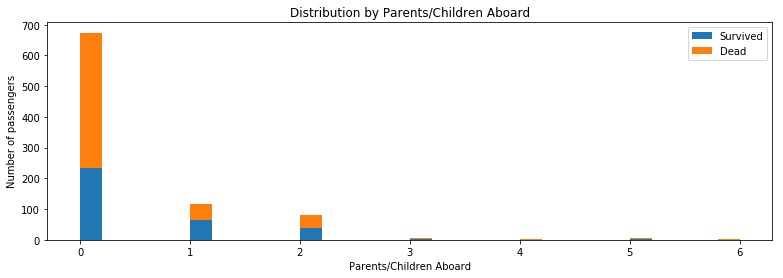

In [16]:
figure = plt.figure(figsize=(13,4))
plt.hist([data[data['Survived']==1]['Parents/Children Aboard'], 
          data[raw_data['Survived']==0]['Parents/Children Aboard']], stacked=True, bins=30, label=['Survived','Dead'])
plt.xlabel('Parents/Children Aboard')
plt.ylabel('Number of passengers')
plt.title('Distribution by Parents/Children Aboard')
plt.legend()

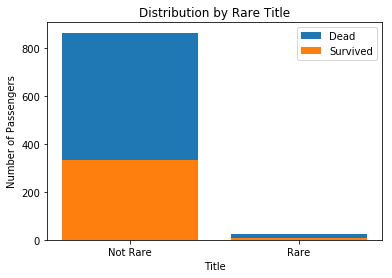

In [17]:
# Count of Dead passengers and their Pclass
# Count of Survived passengers and their Pclass
# List of Pclass
# Bar plot of Dead
# Bar plot of survived
# Legend
# Set x label
# Set y lebel
# Set title
# Print graph

DeadByTitle = pd.DataFrame(data = data[data['Survived']==0].groupby(["Rare"]).size())
SurvivedByTitle = pd.DataFrame(data = data[data['Survived']==1].groupby(["Rare"]).size())
Rare = ["Not Rare","Rare"]
p1 = plt.bar(Rare, DeadByTitle.iloc[:,0], bottom=SurvivedByTitle.iloc[:,0])
p2 = plt.bar(Rare, SurvivedByTitle.iloc[:,0])
plt.legend((p1[0], p2[0]), ('Dead', 'Survived'))
plt.xlabel('Title')
plt.ylabel('Number of Passengers')
plt.title('Distribution by Rare Title')
plt.show()

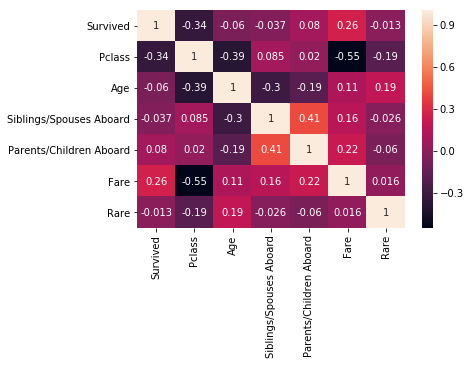

In [18]:
sns.heatmap(data.corr(), annot=True)

# Fare Analysis

([<matplotlib.axis.XTick at 0x16319115f98>,
 <a list of 2 Text xticklabel objects>)

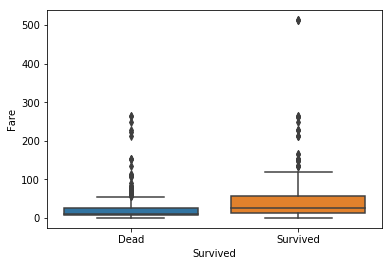

In [19]:
sns.boxplot(x="Survived", y="Fare", data=data)
plt.xticks([0,1], ['Dead', 'Survived'])

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


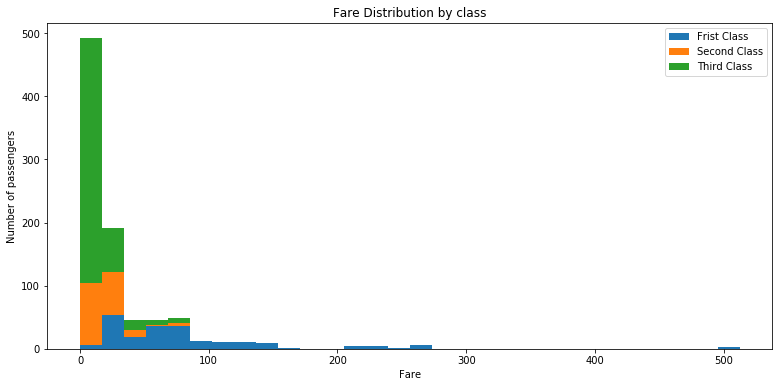

In [20]:
figure = plt.figure(figsize=(13,6))
plt.hist([data[data['Pclass']==1]['Fare'], 
          data[data['Pclass']==2]['Fare'], 
          data[data['Pclass']==3]['Fare']],
         stacked=True, bins=30, label=['Frist Class','Second Class', 'Third Class'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title('Fare Distribution by class')
plt.legend()

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


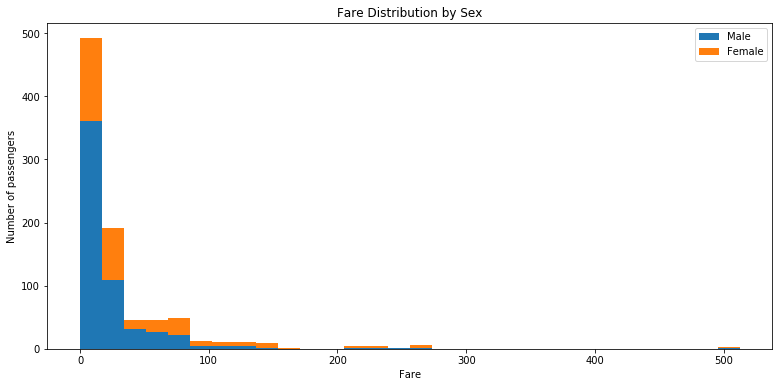

In [21]:
figure = plt.figure(figsize=(13,6))
plt.hist([data[data['Sex']=='male']['Fare'], 
          data[data['Sex']=='female']['Fare']],
         stacked=True, bins=30, label=['Male','Female'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title('Fare Distribution by Sex')
plt.legend()

Fare seems to be very evenly distributed by Sex.

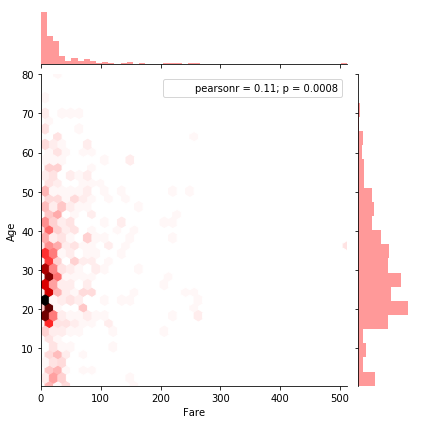

In [22]:
sns.jointplot(y = "Age",x = "Fare", data = data, kind="hex", color = "Red")

This graph align's with the age distribution.

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


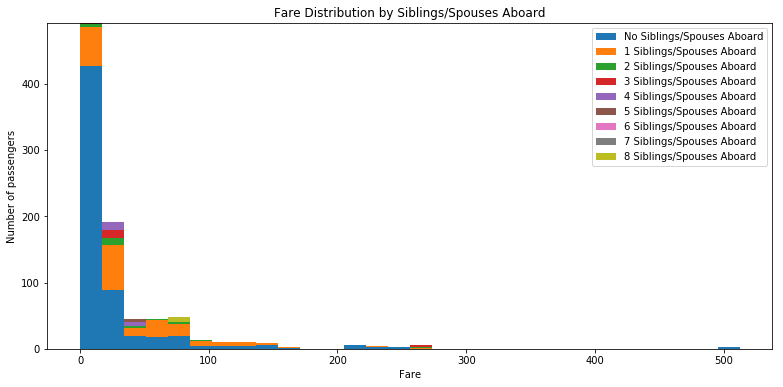

In [23]:
figure = plt.figure(figsize=(13,6))
plt.hist([data[data['Siblings/Spouses Aboard']==0]['Fare'], 
         data[data['Siblings/Spouses Aboard']==1]['Fare'],
         data[data['Siblings/Spouses Aboard']==2]['Fare'],
         data[data['Siblings/Spouses Aboard']==3]['Fare'],
         data[data['Siblings/Spouses Aboard']==4]['Fare'],
         data[data['Siblings/Spouses Aboard']==5]['Fare'],
         data[data['Siblings/Spouses Aboard']==6]['Fare'],
         data[data['Siblings/Spouses Aboard']==7]['Fare'],
         data[data['Siblings/Spouses Aboard']==8]['Fare']],
         stacked=True, bins=30, label=['No Siblings/Spouses Aboard',
                                       '1 Siblings/Spouses Aboard',
                                       '2 Siblings/Spouses Aboard',
                                       '3 Siblings/Spouses Aboard',
                                       '4 Siblings/Spouses Aboard',
                                       '5 Siblings/Spouses Aboard',
                                       '6 Siblings/Spouses Aboard',
                                       '7 Siblings/Spouses Aboard',
                                       '8 Siblings/Spouses Aboard'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title('Fare Distribution by Siblings/Spouses Aboard')
plt.legend()

D:\Users\Shuning\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


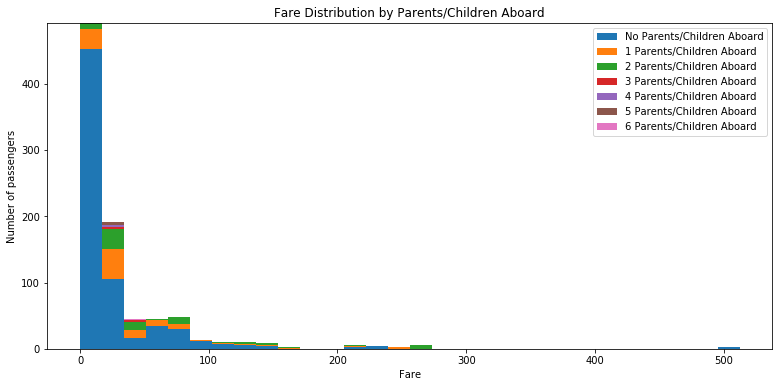

In [24]:
figure = plt.figure(figsize=(13,6))
plt.hist([data[data['Parents/Children Aboard']==0]['Fare'], 
         data[data['Parents/Children Aboard']==1]['Fare'],
         data[data['Parents/Children Aboard']==2]['Fare'],
         data[data['Parents/Children Aboard']==3]['Fare'],
         data[data['Parents/Children Aboard']==4]['Fare'],
         data[data['Parents/Children Aboard']==5]['Fare'],
         data[data['Parents/Children Aboard']==6]['Fare']],
         stacked=True, bins=30, label=['No Parents/Children Aboard',
                                       '1 Parents/Children Aboard',
                                       '2 Parents/Children Aboard',
                                       '3 Parents/Children Aboard',
                                       '4 Parents/Children Aboard',
                                       '5 Parents/Children Aboard',
                                       '6 Parents/Children Aboard'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title('Fare Distribution by Parents/Children Aboard')
plt.legend()

# Step 3 - Modeling

In [25]:
# Drop Name Column
# Convert Sex into dummy

data = data.drop(labels = ["Name"], axis = 1)
data = pd.get_dummies(data, columns = ["Sex"])

In [26]:
# Last look at the data before training

data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Rare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1


In [27]:
## Separate train dataset and test dataset

# Create the X variables
# Create Y
# Make the split

X = data.drop(labels=["Survived"],axis = 1)
Y = data[["Survived"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [28]:
# Cross validation model with Kfold stratified cross val

kfold = StratifiedKFold(n_splits=10)

In [29]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 5],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   29.9s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   36.4s finished
D:\Users\Shuning\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.85521885521885521

In [30]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 659 tasks      | elapsed:   11.7s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   12.6s finished
D:\Users\Shuning\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.84006734006734007

In [31]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

# Best score
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 295 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.0s finished
D:\Users\Shuning\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.81986531986531985

In [32]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 273 out of 280 | elapsed:   10.8s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   10.9s finished
D:\Users\Shuning\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.81818181818181823

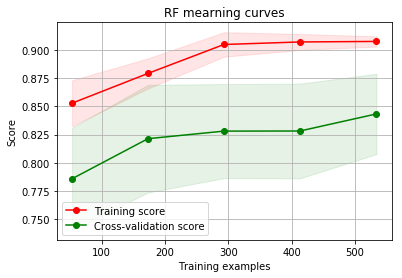

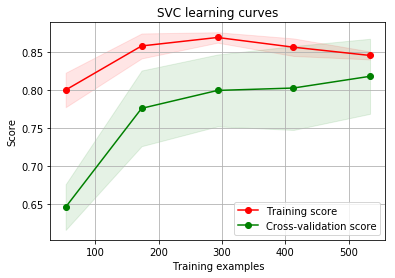

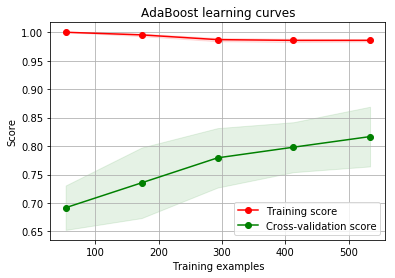

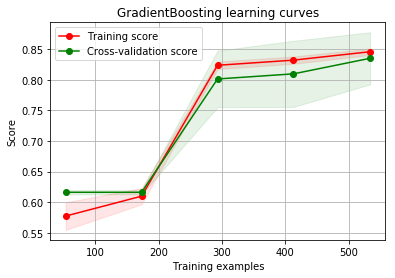

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

# Feature Importance

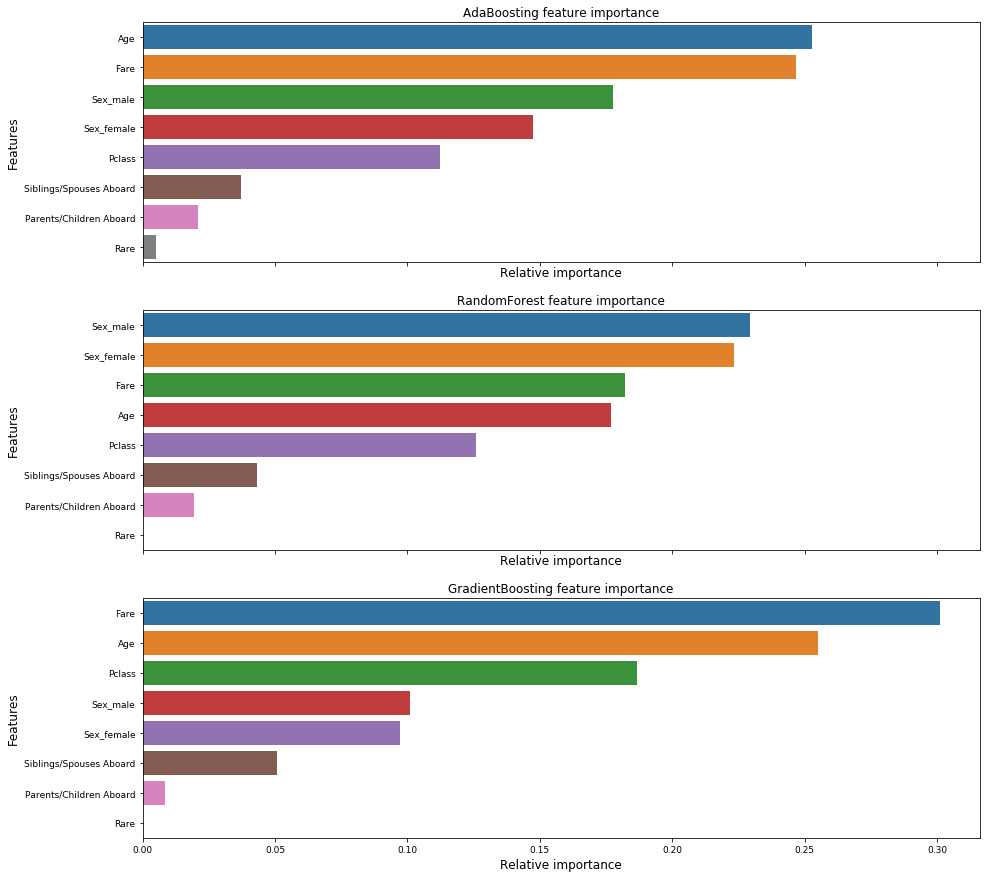

In [34]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

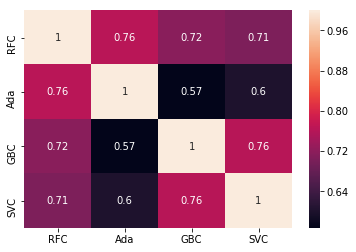

In [35]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

The prediction seems to be quite similar for the 3 classifiers except when Adaboost is compared to the others classifiers.

The 3 classifiers give more or less the same prediction but there is some differences. Theses differences between the 3 classifier predictions are sufficient to consider an ensembling vote.

In [36]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

D:\Users\Shuning\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\Shuning\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
test_Survived = pd.Series(votingC.predict(X_test), name="Survived")

In [38]:
votingC.score(X_test, Y_test)

0.83276450511945388